# SDG2: Food Insecurity Clustering and Nutritional Gap Analysis

This notebook clusters countries by food insecurity levels using World Bank undernourishment data and visualizes trends to identify nutritional gaps.

**Plain-language**: We group countries by hunger levels and show how hunger changes over time.

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
data_path = 'C:/Users/Administrator/xxxxxx/Documents/sdg-portfolio/SDG2-Food-Insecurity-Clustering-and-Nutritional-Gap-Analysis/data/raw_data/API_SN.ITK.DEFC.ZS_DS2_en_csv_v2_171572.csv'  # Update with your filename
df = pd.read_csv(data_path, skiprows=4)
df = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
             var_name='Year', value_name='Undernourishment Rate')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Undernourishment Rate', 'Year'])
print(df.head())

# Plain-language: 'This table shows undernourishment rates for countries over different years.'

                      Country Name Country Code  \
10907  Africa Eastern and Southern          AFE   
10908                  Afghanistan          AFG   
10909   Africa Western and Central          AFW   
10910                       Angola          AGO   
10911                      Albania          ALB   

                                         Indicator Name  Indicator Code  \
10907  Prevalence of undernourishment (% of population)  SN.ITK.DEFC.ZS   
10908  Prevalence of undernourishment (% of population)  SN.ITK.DEFC.ZS   
10909  Prevalence of undernourishment (% of population)  SN.ITK.DEFC.ZS   
10910  Prevalence of undernourishment (% of population)  SN.ITK.DEFC.ZS   
10911  Prevalence of undernourishment (% of population)  SN.ITK.DEFC.ZS   

         Year  Undernourishment Rate  
10907  2001.0              33.163569  
10908  2001.0              46.000000  
10909  2001.0              16.365604  
10910  2001.0              67.400000  
10911  2001.0               4.900000  


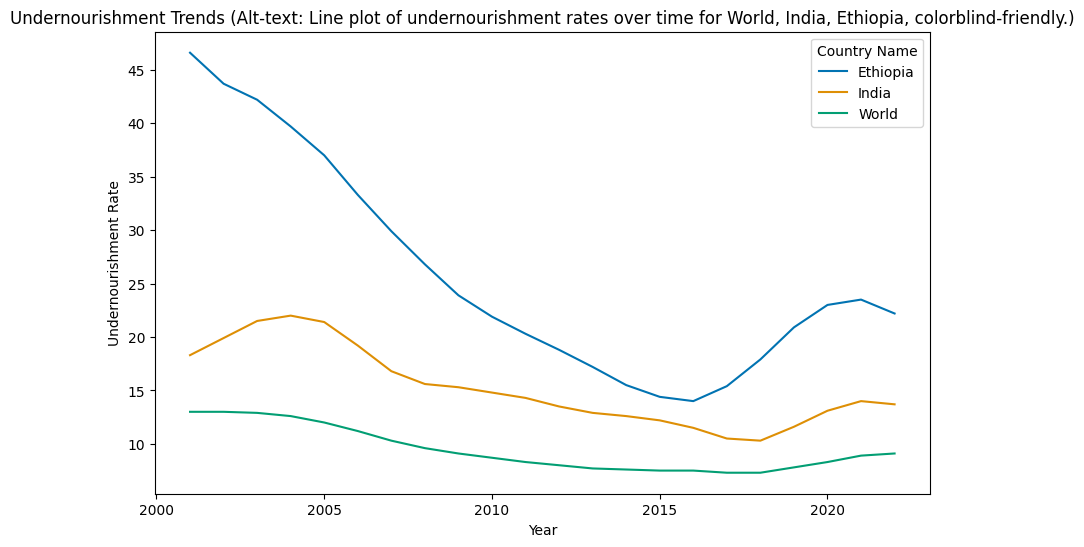

In [7]:
# Visualize trends (accessible)
sns.set_palette('colorblind')
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['Country Name'].isin(['World', 'India', 'Ethiopia'])], 
             x='Year', y='Undernourishment Rate', hue='Country Name')
plt.title('Undernourishment Trends (Alt-text: Line plot of undernourishment rates over time for World, India, Ethiopia, colorblind-friendly.)')
plt.savefig('../results/undernourishment_trends.png')
plt.show()

# Ethics: 'Data may miss informal food systems; we use diverse countries to reduce bias.'

In [8]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering (latest year with data)
latest_year = df['Year'].max()
cluster_data = df[df['Year'] == latest_year][['Country Name', 'Undernourishment Rate']].dropna()
X = cluster_data[['Undernourishment Rate']].values
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_data['Cluster'] = dbscan.fit_predict(X_scaled)
print(cluster_data[['Country Name', 'Undernourishment Rate', 'Cluster']])

# Plain-language: 'Countries are grouped by hunger levels; negative clusters (-1) are outliers with unique patterns.'

                      Country Name  Undernourishment Rate  Cluster
16493  Africa Eastern and Southern              26.795671        0
16494                  Afghanistan              30.400000        0
16495   Africa Western and Central              15.443766        0
16496                       Angola              23.200000        0
16497                      Albania               4.500000        0
...                            ...                    ...      ...
16752                        Samoa               5.400000        0
16754                  Yemen, Rep.              39.500000        0
16755                 South Africa               8.100000        0
16756                       Zambia              35.400000        0
16757                     Zimbabwe              38.100000        0

[219 rows x 3 columns]
